In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os
import cv2
X = []
Y = []

classes = {'no_tumor': 0, 'pituitary_tumor': 1}

for cls in classes:
    path = 'Training/' + cls + '/'
    for filename in os.listdir(path):
        img = cv2.imread(path+filename, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])


In [4]:
np.unique(Y)


array([0, 1])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
pd.Series(Y).value_counts()

1    827
0    306
dtype: int64

In [7]:
X.shape

(1133, 200, 200)

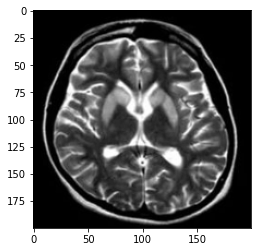

In [8]:
plt.imshow(X[0], cmap='gray')

In [9]:
# X_updated = np.array(X)
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1133, 40000)

In [10]:
from bitarray import test


xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((906, 40000), (227, 40000))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/225
xtest  = xtest/225
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())


255 0
255 0
1.1333333333333333 0.0
1.1333333333333333 0.0


In [13]:
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)
pca = PCA(.98)

pca_train = xtrain
pca_test = xtest

(906, 40000) (227, 40000)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [15]:
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C = 0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [16]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [17]:
print("Trainning Score:",lg.score(pca_train,ytrain))
print("Test Scores:",lg.score(pca_test,ytest))

Trainning Score: 1.0
Test Scores: 0.973568281938326


In [18]:
print("Trainning Score:", sv.score(pca_train, ytrain))
print("Test Scores:", sv.score(pca_test, ytest))


Trainning Score: 0.9900662251655629
Test Scores: 0.986784140969163


In [19]:
pred = sv.predict(pca_test)
np.where(ytest != pred)

(array([ 13,  40, 142], dtype=int64),)

In [20]:
pred[40]

1

In [21]:
ytest[13]

0

In [22]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

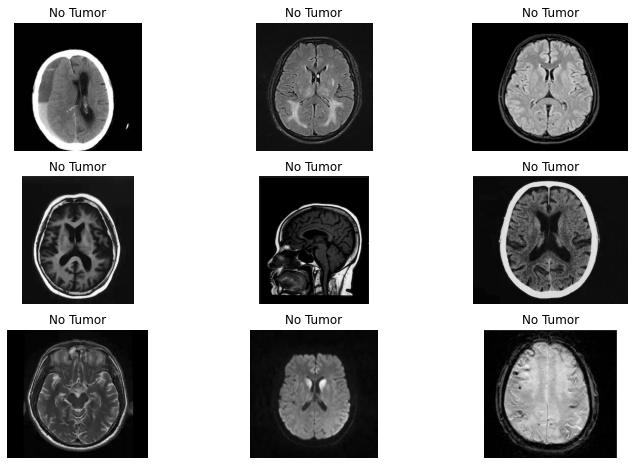

In [23]:
plt.figure(figsize = (12,8))
p = 'Testing/'
c = 1
for i in os.listdir('Testing/no_tumor/')[:9]:
    plt.subplot(3, 3, c)

    img = cv2.imread('Testing/no_tumor/' +i, 0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1, -1)/225
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1
   

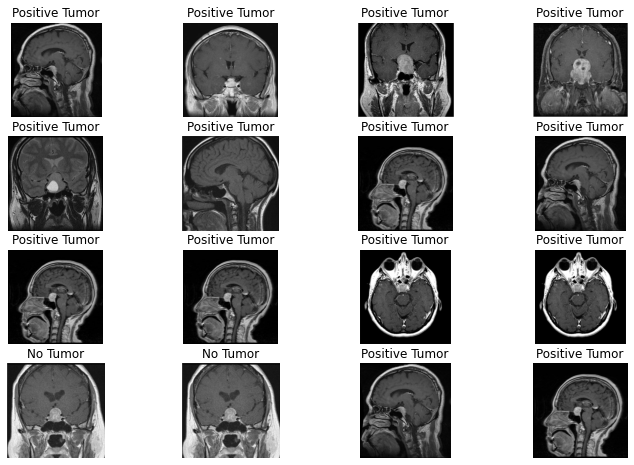

In [24]:
plt.figure(figsize = (12,8))
p = 'Testing/'
c = 1
for i in os.listdir('Testing/pituitary_tumor/')[:16]:
    plt.subplot(4, 4, c)

    img = cv2.imread('Testing/pituitary_tumor/' +i, 0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1, -1)/225
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1
   